We can produce maps of several observables starting from snapshots of simulations

# SPH in a nutshell

In practice the particles Marco is working on are the particles which are sampling the space. Each of them has associated a smoothing kernel function (usually a spline with finite support). The kernel has a so called smoothing length.  So the properties of each point in the space are the sum of the contributions of each particle with a distance less than the smoothing lenght.
This method is lagrangian. The particles move with the flow and tend to be more where the density is higher.

In [8]:
# Preamble
import pynbody
import numpy as np
import matplotlib.pyplot as plt
from luminosity import surface_brightness
from scipy.ndimage.filters import gaussian_filter
from color import color_plot

In [9]:
snap = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap)

In [10]:
pynbody.analysis.halo.center(s.stars, vel=False);

In [11]:
s.properties['boxsize'] = pynbody.units.Unit("1 Gpc")
s.properties['omegaM0'] = 0.28
s.properties

{'omegaM0': 0.28,
 'omegaL0': 0.72,
 'boxsize': Unit("Gpc"),
 'a': 0.9803378872580908,
 'h': 0.7,
 'time': Unit("1.03e+01 s kpc km**-1")}

We have 1859802 gas particles and 140168 star particles, $R_e$ = 1.28 kpc, M$_\star$ = 1.57e9 M$_\odot$

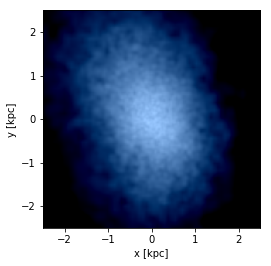

In [12]:
pynbody.plot.stars.render(s.s, width=5);

In [13]:
pynbody.analysis.luminosity.half_light_r(s)

SimArray(1.22971601, 'kpc')

In [14]:
s.s['massform'].in_units('Msol').sum()

SimArray(1.5692543e+09, dtype=float32, 'Msol')

In [15]:
s.gas

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036::gas" len=1859802>

In [16]:
s.stars

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036::star" len=140168>

Isolate the central 10 kpc region. It can be useful in the future

In [17]:
sphere = pynbody.filt.Sphere('10 kpc')
subsnap = s[sphere]

In [18]:
subsnap.gas

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036:sphere::gas" len=79990>

In [19]:
subsnap.stars

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036:sphere::star" len=134799>

In [20]:
width = 10
resolution = 300

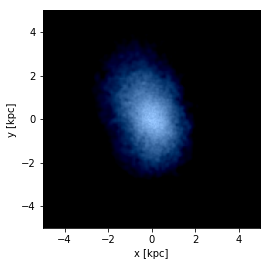

In [21]:
pynbody.plot.stars.render(s.s, width=width);

# Density maps

## Gas column density

In [22]:
pynbody.analysis.angmom.faceon(s.stars);

array([-0.13238233,  0.7807015 ,  0.8230621 ], dtype=float32)

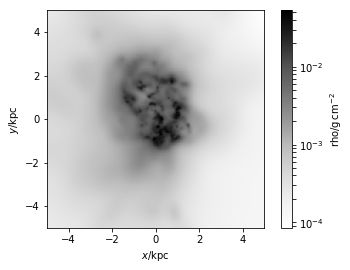

In [23]:
pynbody.plot.sph.image(s.g,qty="rho", units="g cm^-2", width=width, cmap="Greys");
L = pynbody.analysis.angmom.ang_mom_vec(s.star)
L

# Kinematic maps

### Gas kinematic
Centering and rotating sideon

In [24]:
pynbody.analysis.halo.center(s.g, vel=False)
pynbody.analysis.angmom.sideon(s.g);

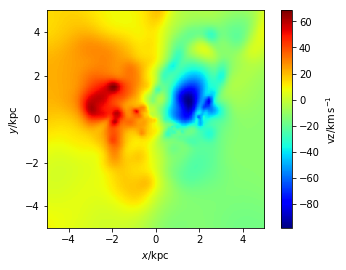

In [25]:
kinematicmap = pynbody.plot.image(s.gas, qty='vz', cmap='jet', width=width, log=False,
                                  units='km s^-1', resolution=resolution)

Convolve with a gaussian of 0.1 kpc to make it more realistic

In [26]:
sigma_kpc = 0.1

def kpc2pix(qty_kpc, width, resolution):
    kpc_per_pixel = width/resolution
    return int(np.floor(qty_kpc/kpc_per_pixel))

sigma_pix = kpc2pix(sigma_kpc, width, resolution)
sigma_pix

3

In [27]:
kinematicmap_convolved = gaussian_filter(kinematicmap, sigma_pix)

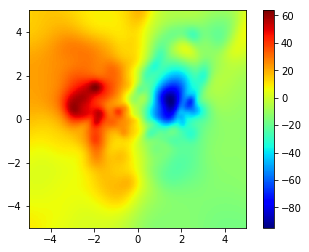

In [28]:
fig, ax = plt.subplots(1)
img = ax.imshow(kinematicmap_convolved, cmap='jet', aspect='equal',
                extent=(-width/2, width/2, -width/2, width/2), origin='lower');
fig.colorbar(img);

# H-$\alpha$ maps


# HI

# Surface Brightness

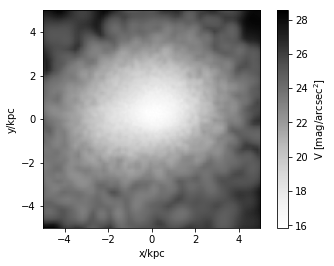

In [31]:
surface_brightness(subsnap, band='v', width=width, mag_filter=None, cmap_name='Greys');

# Stellar color (B-I)

In [22]:
from color import color_plot

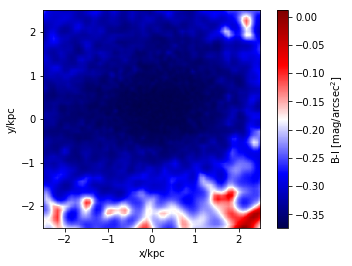

In [31]:
color_plot(s, bands=('b', 'i'), width=5);

# Star rendering

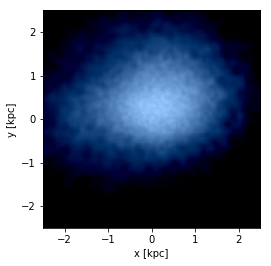

In [32]:
# create an image using the default bands (i, v, u)
pynbody.plot.stars.render(s.s, width='5 kpc');